# Initial visualization

Simple initial data visualization.

In [26]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
# Render plots in notebook
%matplotlib inline

matplotlib.style.use("./styles/apa.mplstyle")

data_dir = "./extracted"
boot_times_path = "{}/boot_times.csv".format(data_dir)
bandwidth_path = "{}/bandwidth_results.csv".format(data_dir)
jitter_path = "{}/jitter_results.csv".format(data_dir)
fileior_path = "{}/fileio_read_results.csv".format(data_dir)
fileiow_path  ="{}/fileio_write_results.csv".format(data_dir)
cpu_path = "{}/cpu_results.csv".format(data_dir)
http_path = "{}/http_benchmark_results.csv".format(data_dir)
pipeline_path = "{}/pipeline_results.csv".format(data_dir)
database_path = "{}/database_results.csv".format(data_dir)

MARKERS = ("o", "s", "x", "v", "+")

def percentual_diff(a, b):
    return ((b - a) / a) * 100


## Boot times

Mean boot times per platform.

metal          2.222161
kvm            9.026568
firecracker    0.023652
docker         0.027077
gvisor         0.076796
dtype: float64
metal          58.4604
kvm            19.3427
firecracker     5.1311
docker          0.6875
gvisor          0.8259
dtype: float64


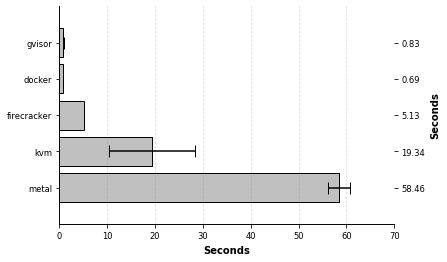

In [27]:
df = pd.read_csv(boot_times_path)
df_mean = df.mean()
df_std = df.std()

fig, ax = plt.subplots()
pos = np.arange(len(df_mean))
rects = ax.barh(pos, df_mean,
    align="center",
    tick_label=df_mean.index,
    xerr=df_std)

ax.xaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("Seconds")
# For right-hand side yaxis ticks and labels
axr = ax.twinx()
axr.set_ylim(ax.get_ylim())
axr.set_yticks(pos)
axr.set_yticklabels(["{:.2f}".format(val) for val in df_mean])
axr.set_ylabel("Seconds")
print(df_std)
print(df_mean)


## Bandwidth and jitter

Mean network bandwidth and jitter.

### Bandwidth

Bandwidth bit / second and CPU usage percentage with TCP traffic.

platform
docker          2.880586
firecracker    13.191837
gvisor         25.757682
kvm             4.987579
metal           1.606861
Name: sent_mbps, dtype: float64
platform
docker          3.002428
firecracker    13.019446
gvisor         25.750872
kvm             4.938006
metal           1.592537
Name: received_mbps, dtype: float64


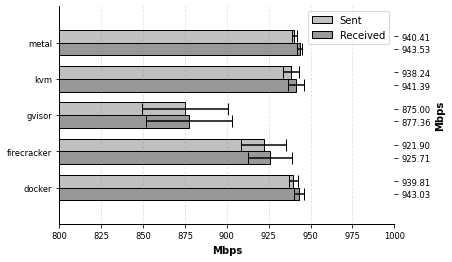

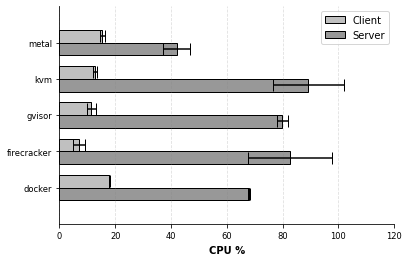

In [28]:
df = pd.read_csv(bandwidth_path)

conv_bps_to_mebibps = 1.0e-6

sent_mbps = "sent_mbps"
received_mbps = "received_mbps"

df[sent_mbps] = df.apply(lambda row: row['sent_bps'] * conv_bps_to_mebibps, axis=1)
df[received_mbps] = df.apply(lambda row: row['received_bps'] * conv_bps_to_mebibps, axis=1)

group_mean = df.groupby(["platform"]).mean()
group_std = df.groupby(["platform"]).std()

pos = np.arange(len(group_mean))
# Height of the bars
height = 0.35

# Send and received bps
fig, ax = plt.subplots()
pos = np.arange(len(group_mean))
rects1 = ax.barh(pos + height / 2, group_mean[sent_mbps],
    align="center",
    height=height,
    xerr=group_std[sent_mbps],
    label="Sent")
rects2 = ax.barh(pos - height / 2, group_mean[received_mbps],
    align="center",
    height=height,
    xerr=group_std[received_mbps],
    label="Received")
ax.set_yticks(pos)
ax.set_yticklabels(group_mean.index)
ax.xaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("Mbps")
ax.set_xlim()
ax.legend()


# For right-hand side yaxis ticks and labels
axr = ax.twinx()
axr.set_ylim(ax.get_ylim())
axr.set_yticks(pos + height / 2)
axr.set_yticklabels(["{:.2f}".format(val) for val in group_mean[sent_mbps]])
axr.set_ylabel("Mbps")

axr = ax.twinx()
ax.set_xlim([800, 1000])
axr.set_ylim(ax.get_ylim())
axr.set_yticks(pos - height / 2)
axr.set_yticklabels(["{:.2f}".format(val) for val in group_mean[received_mbps]])

print(group_std[sent_mbps])
print(group_std[received_mbps])

# CPU
fig, ax = plt.subplots()
pos = np.arange(len(group_mean))
rects1 = ax.barh(pos + height / 2, group_mean["cpu_client"],
    align="center",
    height=height,
    xerr=group_std["cpu_client"],
    label="Client")
rects2 = ax.barh(pos - height / 2, group_mean["cpu_server"],
    align="center",
    height=height,
    xerr=group_std["cpu_server"],
    label="Server")
ax.set_yticks(pos)
ax.set_yticklabels(group_mean.index)
ax.xaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("CPU %")
ax.legend()


### Jitter

Network jitter with UDP traffic.

platform
docker         0.024568
firecracker    0.041975
gvisor         0.032007
kvm            0.032296
metal          0.032971
Name: jitter_ms, dtype: float64


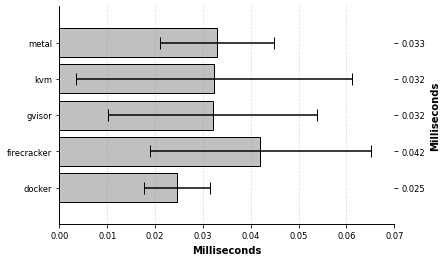

In [29]:
df = pd.read_csv(jitter_path)

group_mean = df.groupby(["platform"]).mean()
group_std = df.groupby(["platform"]).std()

pos = np.arange(len(group_mean))
# Height of the bars
height = 0.35

# Jitter
fig, ax = plt.subplots()
pos = np.arange(len(group_mean))
rects1 = ax.barh(pos, group_mean["jitter_ms"],
    align="center",
    xerr=group_std["jitter_ms"],
    label="Sent")
ax.set_yticks(pos)
ax.set_yticklabels(group_mean.index)
ax.xaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("Milliseconds")


# For right-hand side yaxis ticks and labels
axr = ax.twinx()
axr.set_ylim(ax.get_ylim())
axr.set_yticks(pos)
axr.set_yticklabels(["{:.3f}".format(val) for val in group_mean["jitter_ms"]])
axr.set_ylabel("Milliseconds")

print(group_mean["jitter_ms"])

## File I/O

Filesystem I/O read and write results (bytes per second).

metal          42.328003
kvm            46.695769
firecracker    41.195286
docker          0.313668
gvisor          0.707978
dtype: float64


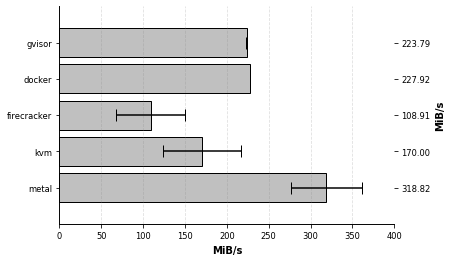

In [30]:
df = pd.read_csv(fileior_path)

# ax = df.mean().plot.bar()
# ax.set_xlabel("Platform")
# ax.set_ylabel("File read MiB/s")

group_mean = df.mean()
group_std = df.std()

pos = np.arange(len(group_mean))
# Height of the bars
height = 0.35

fig, ax = plt.subplots()
# ax.set_title("File read")
pos = np.arange(len(group_mean))
rects1 = ax.barh(pos, group_mean,
    align="center",
    xerr=group_std,
    label="Sent")
ax.set_yticks(pos)
ax.set_yticklabels(group_mean.index)
ax.xaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("MiB/s")


# For right-hand side yaxis ticks and labels
axr = ax.twinx()
axr.set_ylim(ax.get_ylim())
axr.set_yticks(pos)
axr.set_yticklabels(["{:.2f}".format(val) for val in group_mean])
axr.set_ylabel("MiB/s")
print(group_std)


metal          3.968289
kvm            2.247265
firecracker    4.390120
docker         3.759647
gvisor         0.340875
dtype: float64


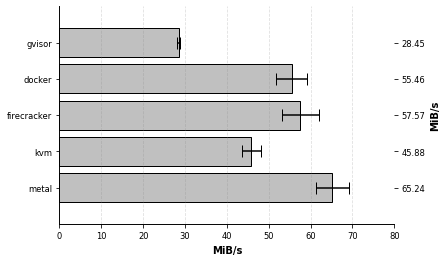

In [31]:
df = pd.read_csv(fileiow_path)

group_mean = df.mean()
group_std = df.std()

pos = np.arange(len(group_mean))
# Height of the bars
height = 0.35

fig, ax = plt.subplots()
# ax.set_title("File write")
pos = np.arange(len(group_mean))
rects1 = ax.barh(pos, group_mean,
    align="center",
    xerr=group_std,
    label="Sent")
ax.set_yticks(pos)
ax.set_yticklabels(group_mean.index)
ax.xaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("MiB/s")


# For right-hand side yaxis ticks and labels
axr = ax.twinx()
axr.set_ylim(ax.get_ylim())
axr.set_yticks(pos)
axr.set_yticklabels(["{:.2f}".format(val) for val in group_mean])
axr.set_ylabel("MiB/s")
print(group_std)

## CPU

Mean CPU `sysbench` events / second per platform.

metal          10.452942
kvm            52.183533
firecracker    59.395394
docker         59.871936
gvisor         80.019850
dtype: float64


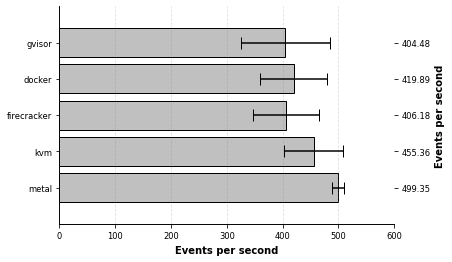

In [32]:
df = pd.read_csv(cpu_path)

group_mean = df.mean()
group_std = df.std()

pos = np.arange(len(group_mean))
# Height of the bars
height = 0.35

# Jitter
fig, ax = plt.subplots()
# ax.set_title("CPU Events")
pos = np.arange(len(group_mean))
rects1 = ax.barh(pos, group_mean,
    align="center",
    xerr=group_std,
    label="Sent")
ax.set_yticks(pos)
ax.set_yticklabels(group_mean.index)
ax.xaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("Events per second")


# For right-hand side yaxis ticks and labels
axr = ax.twinx()
axr.set_ylim(ax.get_ylim())
axr.set_yticks(pos)
axr.set_yticklabels(["{:.2f}".format(val) for val in group_mean])
axr.set_ylabel("Events per second")

print(group_std)

## HTTP Benchmark

HTTP benchmark results.

platform
docker         1521.476750
firecracker    2259.844200
kvm            2183.102575
metal          1425.183925
dtype: float64
platform        docker  firecracker        kvm      metal
concurrency                                              
10            144.7639     227.1436   212.0938   135.7446
30            444.8154     651.2330   634.1265   407.9098
60            878.3376    1295.0214  1258.6708   816.2628
90           1316.9993    1933.4810  1874.7367  1220.5439
120          1752.2397    2591.7672  2468.0129  1626.6657
150          2126.9843    3231.5026  3081.3143  2038.0953
180          2618.7178    3859.3959  3834.5019  2445.3631
200          2888.9560    4289.2089  4101.3637  2710.8862
For docker
 concurrency
10     6.644316
30     9.047490
60     7.604757
90     7.902657
120    7.719718
150    4.361376
180    7.089119
200    6.568693
dtype: float64
For firecracker
 concurrency
10     67.331592
30     59.651227
60     58.652508
90     58.411426
120    59.330046
150    

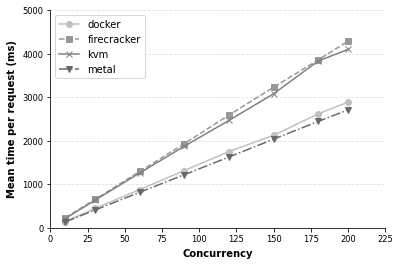

In [39]:
df = pd.read_csv(http_path)

fig, ax = plt.subplots()

df_mean = df.groupby(["platform", "concurrency"]).mean().reset_index().pivot(
    index="concurrency", columns="platform", values="mean_time_per_req"
)

ax.yaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("Concurrency")
ax.set_ylabel("Mean time per request (ms)")
ax.set_ylim([0, 5000])

i = 0
for column in df_mean:
    ax.plot(df_mean[column], marker=MARKERS[i], label=column)
    i += 1

ax.legend()

print(df_mean.mean())
print(df_mean)

for plat in ["docker", "firecracker", "kvm"]:
    print("For {}\n".format(plat), percentual_diff(df_mean["metal"], df_mean[plat]))


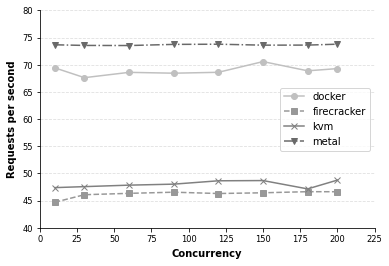

In [34]:
df = pd.read_csv(http_path)

fig, ax = plt.subplots()

df_mean = df.groupby(["platform", "concurrency"]).mean().reset_index().pivot(
    index="concurrency", columns="platform", values="req_per_sec"
)
ax.yaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("Concurrency")
ax.set_ylabel("Requests per second")

i = 0
for column in df_mean:
    ax.plot(df_mean[column], marker=MARKERS[i], label=column)
    i += 1

ax.legend()

## Pipeline results

Build pipeline results.

             time_seconds
platform                 
docker          14.712429
firecracker      6.979335
kvm             19.713504
metal            1.523884


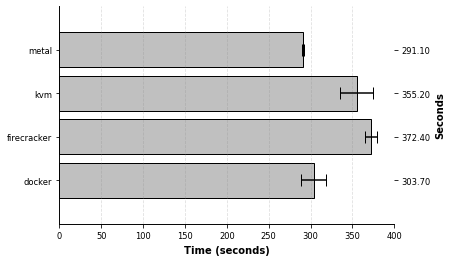

In [40]:
df = pd.read_csv(pipeline_path)

group_mean = df.groupby(["platform"]).mean()
group_std = df.groupby(["platform"]).std()

pos = np.arange(len(group_mean))
# Height of the bars
height = 0.35
# Jitter
fig, ax = plt.subplots()
# ax.set_title("Pipeline turnover time")
pos = np.arange(len(group_mean))
rects1 = ax.barh(pos, group_mean["time_seconds"],
    align="center",
    xerr=group_std["time_seconds"],
    label="Sent")
ax.set_yticks(pos)
ax.set_yticklabels(group_mean.index)
ax.xaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("Time (seconds)")


# For right-hand side yaxis ticks and labels
axr = ax.twinx()
axr.set_ylim(ax.get_ylim())
axr.set_yticks(pos)
axr.set_yticklabels(["{:.2f}".format(val) for val in group_mean["time_seconds"]])
axr.set_ylabel("Seconds")

print(group_std)

## Database

Database performance results.

platform
docker    35243.142857
gvisor     7094.028571
kvm       21916.471429
metal     29325.042857
dtype: float64
platform      docker  gvisor      kvm    metal
concurrency                                   
10           27878.9  6983.5  22938.6  26568.4
20           39602.2  7130.9  23354.4  33007.4
30           38516.8  7136.5  22604.1  31893.4
40           36953.3  7129.5  22041.8  30315.9
50           35714.6  7110.0  21174.3  28648.1
60           34500.7  7092.6  20835.0  27831.5
70           33535.5  7075.2  20467.1  27010.6
For docker
 concurrency
10     4.932551
20    19.979762
30    20.767306
40    21.894122
50    24.666557
60    23.962776
70    24.156813
dtype: float64
For gvisor
 concurrency
10   -73.715015
20   -78.396057
30   -77.623897
40   -76.482638
50   -75.181600
60   -74.515926
70   -73.805839
dtype: float64
For kvm
 concurrency
10   -13.662095
20   -29.244957
30   -29.126089
40   -27.292939
50   -26.088292
60   -25.138782
70   -24.225674
dtype: float64


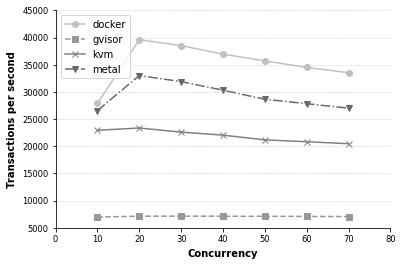

In [36]:
df = pd.read_csv(database_path)

read_only = df[df.write_queries.eq(0)]

ax.set_ylabel("Transactions per second")

fig, ax = plt.subplots()

df_mean = read_only.groupby(["platform", "concurrency"]).mean().reset_index().pivot(
    index="concurrency", columns="platform", values="transactions"
)


ax.yaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("Concurrency")
ax.set_ylabel("Transactions per second")

i = 0
for column in df_mean:
    ax.plot(df_mean[column], marker=MARKERS[i], label=column)
    i += 1

ax.legend()

def percentual_diff(a, b):
    return ((b - a) / a) * 100

print(df_mean.mean())
print(df_mean)

for plat in ["docker", "gvisor", "kvm"]:
    print("For {}\n".format(plat), percentual_diff(df_mean["metal"], df_mean[plat]))

platform
docker    6593.742857
gvisor    3068.928571
kvm       4989.957143
metal     5944.714286
dtype: float64
platform     docker  gvisor     kvm   metal
concurrency                                
10           2930.6  1663.6  2054.6  2605.9
20           4951.7  2655.7  3504.5  4505.8
30           6093.0  3132.0  4540.3  5543.4
40           7157.1  3232.9  5307.5  6344.3
50           7849.2  3545.3  6009.1  7032.8
60           8460.8  3607.1  6569.3  7560.7
70           8713.8  3645.9  6944.4  8020.1
For docker
 concurrency
10    12.460186
20     9.896134
30     9.914493
40    12.811500
50    11.608463
60    11.904982
70     8.649518
dtype: float64
For gvisor
 concurrency
10   -36.160252
20   -41.060411
30   -43.500379
40   -49.042448
50   -49.589068
60   -52.291454
70   -54.540467
dtype: float64
For kvm
 concurrency
10   -21.155839
20   -22.222469
30   -18.095393
40   -16.342228
50   -14.556080
60   -13.112542
70   -13.412551
dtype: float64


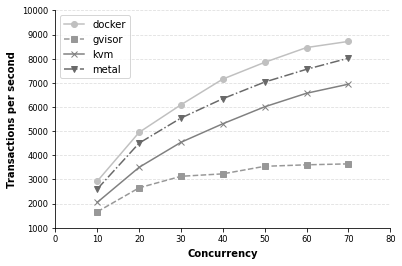

In [37]:
write_only = df[df.read_queries.eq(0)]

fig, ax = plt.subplots()

df_mean = write_only.groupby(["platform", "concurrency"]).mean().reset_index().pivot(
    index="concurrency", columns="platform", values="transactions"
)

ax.yaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("Concurrency")
ax.set_ylabel("Transactions per second")

i = 0
for column in df_mean:
    ax.plot(df_mean[column], marker=MARKERS[i], label=column)
    i += 1

ax.legend()


print(df_mean.mean())
print(df_mean)

for plat in ["docker", "gvisor", "kvm"]:
    print("For {}\n".format(plat), percentual_diff(df_mean["metal"], df_mean[plat]))

platform
docker    3694.885714
gvisor    1184.500000
kvm       3690.485714
metal     3274.957143
dtype: float64
platform     docker  gvisor     kvm   metal
concurrency                                
10           1540.6   950.2  1632.4  1342.1
20           2607.6  1275.7  2567.8  2205.4
30           3027.8  1271.3  3304.9  2762.3
40           3611.9  1252.0  3860.4  3230.9
50           4340.1  1182.9  4403.7  3827.0
60           5002.2  1198.6  4852.9  4634.2
70           5734.0  1160.8  5211.3  4922.8
For docker
 concurrency
10    14.790254
20    18.237055
30     9.611556
40    11.792380
50    13.407369
60     7.940961
70    16.478427
dtype: float64
For gvisor
 concurrency
10   -29.200507
20   -42.155618
30   -53.976758
40   -61.249188
50   -69.090672
60   -74.135773
70   -76.419924
dtype: float64
For kvm
 concurrency
10    21.630281
20    16.432393
30    19.643051
40    19.483735
50    15.069245
60     4.719261
70     5.860486
dtype: float64


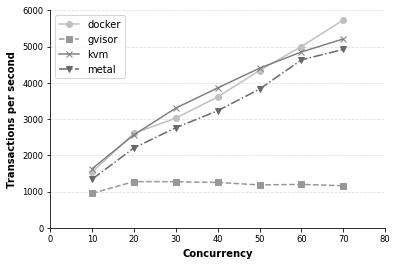

In [38]:
read_write = df[df.write_queries.ne(0) & df.read_queries.ne(0)]
fig, ax = plt.subplots()

df_mean = read_write.groupby(["platform", "concurrency"]).mean().reset_index().pivot(
    index="concurrency", columns="platform", values="transactions"
)
ax.yaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("Concurrency")
ax.set_ylabel("Transactions per second")

i = 0
for column in df_mean:
    ax.plot(df_mean[column], marker=MARKERS[i], label=column)
    i += 1

ax.legend()

print(df_mean.mean())
print(df_mean)

for plat in ["docker", "gvisor", "kvm"]:
    print("For {}\n".format(plat), percentual_diff(df_mean["metal"], df_mean[plat]))